
https://www.ngdc.noaa.gov/stp/satellite/goes/index.html

https://omniweb.gsfc.nasa.gov/form/dx1.html

### FTP:

https://spdf.gsfc.nasa.gov/pub/data/

ftp://gdc.cddis.eosdis.nasa.gov

### NETCDF4 NUM2DATE:

https://gist.github.com/okadate/1ba71717afdd9b3dba3a

https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/docs/GOES-R_EUVS_L2_Data_Users_Guide.pdf


||Code | Meaning|
|-:|:--|:-------------------------------------------------------------------|
|1|c1p | 1-day predicted solution (CODE)                                    |
|2|c2p | 2-day predicted solution (CODE)                                    |
|3|cod | Final solution (CODE)                                              |
|4|cor | Rapid solution (CODE)                                              |
|5|*e1p | 1-day predicted solution (ESA)                                     |
|6|*e2p | 2-day predicted solution (ESA)                                     |
|7|ehr | Rapid high-rate solution, one map per hour, (ESA)                  |
|8|esa | Final solution (ESA)                                               |
|9|esr | Rapid solution (ESA)                                               |
|10|*ilp | 1-day predicted solution (IGS combined)                            |
|11|*i2p | 2-day predicted solution (IGS combined)                            |
|12|igr | Rapid solution (IGS combined)                                      |
|13|igs | Final combined solution (IGS combined)                             |
|14|jpl | Final solution (JPL)                                               |
|15|jpr | Rapid solution (JPL)                                               |
|16|*u2p | 2 day predicted solution (UPC)                                     |
|17|upc | Final solution (UPC)                                               |
|18|uhr | Rapid high-rate solution, one map per hour, (UPC)                  |
|19|upr | Rapid solution (UPC)                                               |
|20|uqr | Rapid high-rate solution, one map per 15 minutes, (UPC)            |



||Code | Meaning|
|-:|:--|:--------------------------------------------------------------------|
|21|emr | Rapid solution, (NRCAN) Canadian Geodetic Survey of Natural Resources Canada          |
|22|cas | Final solution, (CAS) Chinese Academy of Sciences              |
|23|car | Rapid solution, (CAS) Chinese Academy of Sciences            |
|24|whu | Final solution, (WHU) Wuhan University            |
|25|whr | Rapid solution, (WHU) Wuhan University            |


https://cddis.nasa.gov/Data_and_Derived_Products/GNSS/atmospheric_products.html<br>
https://notebook.community/daniestevez/jupyter_notebooks/IONEX<br>
https://github.com/gnss-lab/ionex/tree/master/ionex<br>
https://spdf.gsfc.nasa.gov/pub/data/gps/tec15min_igs/<br>


<p>netCDF : </p>
https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648<br>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
# from spacepy import pycdf
import netCDF4 as nc
import pytz
import cartopy.crs as ccrs
import datetime
from utilities.IONEX import dmd_ionex
import glob
# from datetime import datetime
import datetime
import pandas as pd
import re
import scipy.io

from utilities.IONEX import IONEX,ionex_filename_to_date
from utilities.IONEX import dmd_rms_ionex


import seaborn as sns
from scipy import interpolate


# % matplotlib qt
# Larger figure size
fig_size = [19, 15]
plt.rcParams['figure.figsize'] = fig_size

In [2]:
YEARS = [2013,2014,2015,2017,2018,2019]#,2015,2017,2018,2019]#[2013,2014,2015,2017,2018,2019]

days_list = list(range(1,366)) # all years days [1,365]
# years_list = YEARS#[2013]
# days_list = [1,365]
years_list = YEARS

ionex_igs = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_igs'),centre='igs')
ionex_c1p = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_c1p'),centre='c1p')

ionex_esr = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_esr'),centre='esr')
ionex_jpr = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_jpr'),centre='jpr')
ionex_whr = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_whr'),centre='whr')

ionex_igr = IONEX(save_directory=os.path.join(os.path.abspath('.'),'ionex_igr'),centre='igr')


# ionex_esr.download_ionex(years_list,days_list,files_report=False,debug=False,run_async=True)
# ionex_jpr.download_ionex(years_list,days_list,files_report=False,debug=False,run_async=True)
# ionex_whr.download_ionex(years_list,days_list,files_report=False,debug=False,run_async=True)

# ionex_igr.download_ionex(years_list,days_list,files_report=True,debug=False,run_async=True)




In [23]:
# igr_rms,igr_rms_file_names = ionex_igr.get_numpy_rmsmaps(years_list,days_list)
igs_rms,igs_rms_file_names = ionex_igs.get_numpy_rmsmaps(years_list,days_list)
c1p,c1p_file_names = ionex_c1p.get_numpy_tecmaps(years_list,days_list)
# igs,igs_file_names = ionex_igs.get_numpy_tecmaps(years_list,days_list)

# esr,esr_file_names = ionex_esr.get_numpy_tecmaps(years_list,days_list)
# upr,upr_file_names = ionex_esr.get_numpy_tecmaps(years_list,days_list)
# whr,whr_file_names = ionex_esr.get_numpy_tecmaps(years_list,days_list)




Year : 2019, Days : 100%|██████████| 365/365 [02:52<00:00,  2.12it/s]


In [5]:
igs_rms,igs_rms_file_names = None,None
# igs_rms_file_names[:3],
igr_rms_file_names.index('l:\\PhD\\TEC\\ionex_igr\\2014\\igrg1580.14i'),igr_rms.shape

(522, (2190, 13, 71, 73))

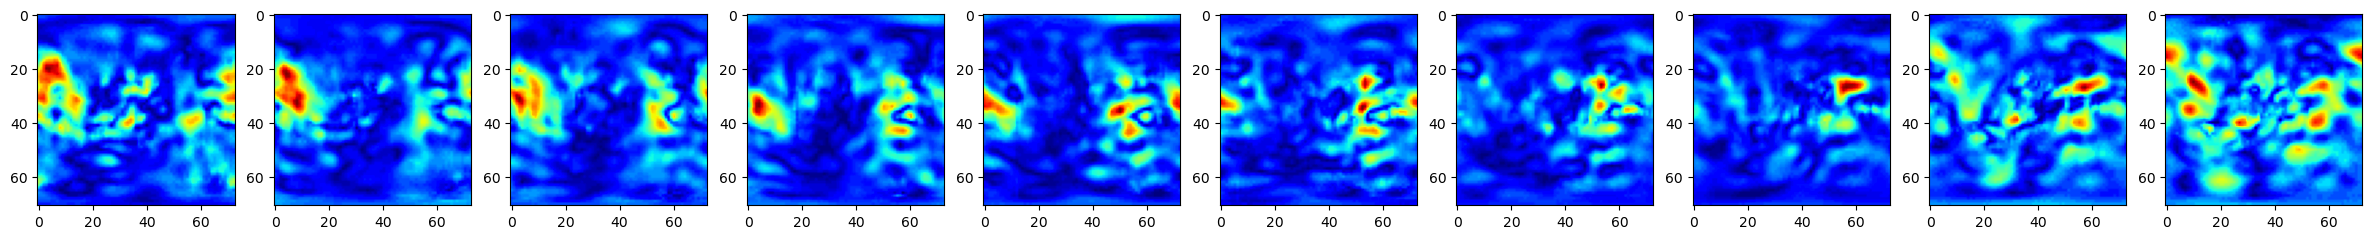

(None, (2190, 13, 71, 73))

In [6]:
fig,axs = plt.subplots(1,10,figsize=(30,30))

for i,ax in enumerate(axs):
    ax.imshow(igr_rms[150,i,:,:],cmap='jet')

plt.show(),igr_rms.shape

In [7]:
# igs_cp = igs[:,:-1,:,:] #* 10
c1p_cp = c1p[:,:-1,:,:] #* 10
# igs_rms_cp = igs_rms[:,:-1,:,:]
igr_rms_cp = igr_rms[:,:-1,:,:]

igr_rms_cp.shape,c1p_cp.shape

((2190, 12, 71, 73), (2190, 12, 71, 73))

# DMD + DMDc

In [8]:
def DMD(X,Xprime,r=None,thr=1e-10):
    
    U,S,Vt = np.linalg.svd(X,full_matrices=False)
    n_rows,n_cols = X.shape
    if r is None:
        r = np.sum(S > thr)
    # r = int(np.ceil(r))
    Ur = U[:,:r]
    Sr = np.diag(S[:r])
    Vtr = Vt[:r,:]

    Atilda = Ur.T @ Xprime @ Vtr.T @ np.diag(1.0/S[:r])
    W,Lambda = np.linalg.eig(Atilda)
    W = np.diag(W)
    Phi = Xprime @ Vtr.T @ np.diag(1.0/S[:r]) @ W
    
    return (Phi,Ur,Atilda,np.nan)

def DMDc(X,Xprime,Y=None,r=None,p=None,thr=1e-10):
    if not p is None and not r is None: 
        if p <= r : raise Exception("truncation value 'p' must be greater then truncation value 'r'")
    # 1.
    OMEGA = X
    x_shape = X.shape
    if not Y is None: 

        OMEGA = np.concatenate((X,Y),axis=0)
    else:
        return DMD(X,Xprime)

    U_omega,S_omega,Vt_omega = np.linalg.svd(OMEGA,full_matrices=False)
    
    if p is None:
        p = np.sum(S_omega > thr)
    Up_omega = U_omega[:,:p]
    Sp_omega = np.diag(1.0/S_omega[:p])
    Vtp_omega = Vt_omega[:p,:]
    
    if not Y is None:
        Up_omega_1 = Up_omega[:x_shape[0],:]
        Up_omega_2 = Up_omega[x_shape[0]:,:]
    else:
        Up_omega_1 = Up_omega
        Up_omega_2 = np.zeros(shape=Sp_omega.shape)#np.array([1])#Up_omega[x_shape[0]:,:]
    # 3.
    U_prime,S_prime,Vt_prime = np.linalg.svd(Xprime,full_matrices=False)

    if r is None:
        r = np.sum(S_prime > thr)
    Ur_prime = U_prime[:,:r]
    Sr_prime = np.diag(1.0/S_prime[:r])
    Vtr_prime = Vt_prime[:r,:]

    # 4.
    A_tilda = Ur_prime.T @ Xprime @ Vtp_omega.T @ Sp_omega @ Up_omega_1.T @ Ur_prime
    B_tilda = Ur_prime.T @ Xprime @ Vtp_omega.T @ Sp_omega @ Up_omega_2.T
    #5.
    W,Lambda = np.linalg.eig(A_tilda)
    Phi = Xprime @ Vtp_omega.T @  Sp_omega @ Up_omega_1.T @ Ur_prime @ W

    return (Phi,Ur_prime,A_tilda,B_tilda)

def maps_rmse(m1,m2):
    return np.sqrt(np.mean(np.square(m1-m2),axis=(1,2)))

def latlon2index(latlon,shape):
    lat,lon = latlon
    height,width = shape
    
    row = int((87.5 - lat)/175.0 * height)
    col = int((lon + 180)/360.0 * width)
    
    return (row,col)
    
def sats_path_2_days(sat_paths_file):
    sat_paths = scipy.io.loadmat(sat_paths_file)
    keys_list = list(sat_paths.keys())[3:]
    key_pairs = list(zip(keys_list[::2],keys_list[1::2]))

    return list(np.concatenate((sat_paths[a[0]],sat_paths[a[1]])).T for a in key_pairs)

def sattelite_path_maps_rmse(m1,m2,sat_paths_file):

    def build_sparse_mat(mat,sats_latlons):
        mat_sparse = np.zeros(mat.shape)
        # print(mat_sparse.shape,mat.shape)
        for latlon in sats_latlons:
            # print(latlon)
            # if latlon[0] == 0 or latlon[1] == 0 : continue
            row,col = latlon2index(latlon,mat.shape)
            # sat_map[row][col] = 1

            mat_sparse[row][col] = mat[row][col]

        
        # plt.imshow(mat_sparse)
        
        mat_sparse = np.expand_dims(mat_sparse, axis=0)
        return mat_sparse



    # m1_sparse = np.zeros(m1.shape)
    # m2_sparse = np.zeros(m2.shape)

    sats_days_list = sats_path_2_days(sat_paths_file)
    m1_sparse = np.concatenate(tuple(build_sparse_mat(m1[i],sats) for i,sats in enumerate(sats_days_list)) )
    m2_sparse = np.concatenate(tuple(build_sparse_mat(m2[i],sats) for i,sats in enumerate(sats_days_list)) )

    # mask = b != 0 
    # mask,np.sum(mask)

    diff = m1_sparse-m2_sparse
    return np.sqrt(np.sum(np.square(diff),axis=(1,2)) / np.sum(m1_sparse != 0,axis=(1,2))) 
    
    

def DMDc_prediction(snapshots_mat,controls_mat,upto_date_index,n_train_indecies,n_pred_days,n_samples = 12):
    A = snapshots_mat
    B = controls_mat
    # print("B : ",B.shape)


    pred_maps = []

    for pred_day_number in range(n_pred_days):

        day_shift = pred_day_number * n_samples

        in_start = upto_date_index - n_train_indecies + day_shift
        in_end = upto_date_index - 1 + day_shift

        out_start = in_start + 1 
        out_end = in_end + 1

        X = A[:,in_start:in_end]
        Xprime = A[:,out_start:out_end]

        # X = X - np.mean(X)
        # X = X /  np.std(X)

        # Xprime = Xprime - np.mean(Xprime)
        # Xprime = Xprime /  np.std(Xprime)

        Y = None
        if not B is None:
            
            Y = B[:,in_start:in_end]

            a_max,a_min = np.max(A),np.min(A)
            y_max,y_min = np.max(Y),np.min(Y)

            Y = Y - np.mean(Y)
            Y = Y / np.std(Y)

            # Y = Y * (np.mean(A) / np.mean(Y))
            # Y = Y * (np.median(A) / np.median(Y))

            # Y = (Y-y_min) / (y_max-y_min)
            # Y = (Y * (a_max-a_min)) + a_min
        
        
        (Phi,Ur_prime,A_tilda,B_tilda) = DMDc(X,Xprime,Y)


        a = A[:,in_end]
        
        pred_day = []
        for sample_idx in range(n_samples+1):

            a_tilda = Ur_prime.T @ a
            p = Ur_prime @ (A_tilda @ a_tilda)
            if not B_tilda is np.nan:
                y = B[:,in_end + sample_idx]
                p = Ur_prime @ (A_tilda @ a_tilda + B_tilda @ y)

            
            pred_day.append(p)
            a = p

        pred_maps.append(pred_day)

    pred_maps = np.array(pred_maps)

    return pred_maps

def compare_DMDc_date_base(tec_source,tec_source_filenames,control_source,compare_source,datetime_list,sat_paths_file=None,n_days_to_train=120):

    dates = list(map(ionex_filename_to_date,tec_source_filenames))

    d,s,h,w = tec_source.shape

    print(tec_source.shape,compare_source.shape)

    A = tec_source.reshape(d*s,h*w).T
    print(A.shape,compare_source.shape)

    B=None
    if not control_source is None :B = control_source.reshape(d*s,-1).T
    C = compare_source.reshape(d*s,h*w).T

    n_samples = s


    comparison = {}

    for date in datetime_list:
        
        day_index = dates.index(date)
        train_range = n_days_to_train if n_days_to_train <= day_index else day_index

        day_index*=n_samples
        train_range*=n_samples

        
        # pred_tec=None
        # print(B.shape)
        full_pred_tec = DMDc_prediction(A,B,day_index,train_range,1,n_samples)




        full_pred_tec_no_control = DMDc_prediction(A,None,day_index,train_range,1,n_samples)

        #------------------------------------------------------------------------------SHIFTING------------------------------------------------------------
        # shift = 2
        # full_pred_tec_shift_2 = DMDc_prediction(A,np.pad(B, ((0,0),(shift,0)))[:,:-shift],day_index,train_range,1,n_samples)
        # shift = 4
        # full_pred_tec_shift_4 = DMDc_prediction(A,np.pad(B, ((0,0),(shift,0)))[:,:-shift],day_index,train_range,1,n_samples)
        # shift = 6
        # full_pred_tec_shift_6 = DMDc_prediction(A,np.pad(B, ((0,0),(shift,0)))[:,:-shift],day_index,train_range,1,n_samples)
        # shift = 8
        # full_pred_tec_shift_8 = DMDc_prediction(A,np.pad(B, ((0,0),(shift,0)))[:,:-shift],day_index,train_range,1,n_samples)
        # shift = 10
        # full_pred_tec_shift_10 = DMDc_prediction(A,np.pad(B, ((0,0),(shift,0)))[:,:-shift],day_index,train_range,1,n_samples)
        # shift = 12
        # full_pred_tec_shift_12 = DMDc_prediction(A,np.pad(B, ((0,0),(shift,0)))[:,:-shift],day_index,train_range,1,n_samples)

        # pred_tec_shift_2 =   full_pred_tec_shift_2.reshape(1,n_samples+1,h,w).squeeze(0)[:-1].reshape(n_samples,h,w)
        # pred_tec_shift_4 =   full_pred_tec_shift_4.reshape(1,n_samples+1,h,w).squeeze(0)[:-1].reshape(n_samples,h,w)
        # pred_tec_shift_6 =   full_pred_tec_shift_6.reshape(1,n_samples+1,h,w).squeeze(0)[:-1].reshape(n_samples,h,w)
        # pred_tec_shift_8 =   full_pred_tec_shift_8.reshape(1,n_samples+1,h,w).squeeze(0)[:-1].reshape(n_samples,h,w)
        # pred_tec_shift_10 = full_pred_tec_shift_10.reshape(1,n_samples+1,h,w).squeeze(0)[:-1].reshape(n_samples,h,w)
        # pred_tec_shift_12 = full_pred_tec_shift_12.reshape(1,n_samples+1,h,w).squeeze(0)[:-1].reshape(n_samples,h,w)

        #------------------------------------------------------------------------------SHIFTING------------------------------------------------------------
        
        # pred_tec_no_control = DMDc_prediction(A,B[::2,:],day_index,train_range,1,n_samples)

        # full_pred_tec -= np.min(full_pred_tec.reshape(1,n_samples+1,-1))
        # full_pred_tec_no_control -= np.min(full_pred_tec_no_control.reshape(1,n_samples+1,-1))

        full_pred_tec = full_pred_tec.reshape(1,n_samples+1,h,w)
        full_pred_tec_no_control = full_pred_tec_no_control.reshape(1,n_samples+1,h,w)
        # print(full_pred_tec.shape)

        pred_tec = full_pred_tec.squeeze(0)[:-1].reshape(n_samples,h,w)
        pred_tec_no_control = full_pred_tec_no_control.squeeze(0)[:-1].reshape(n_samples,h,w)
        
        
        true_tec = A[:,day_index:day_index + n_samples].T.reshape(n_samples,h,w)
        ref_tec = C[:,day_index:day_index + n_samples].T.reshape(n_samples,h,w)


        #16:30,38:48 [:,16:30,38:48]
        



        if sat_paths_file:

            

            ref_rmse =                  sattelite_path_maps_rmse(true_tec,ref_tec               ,sat_paths_file)
            pred_rmse =                 sattelite_path_maps_rmse(true_tec,pred_tec              ,sat_paths_file)
            no_control_rmse =           sattelite_path_maps_rmse(true_tec,pred_tec_no_control   ,sat_paths_file)

            # pred_tec_shift_2_rmse =     sattelite_path_maps_rmse(true_tec ,pred_tec_shift_2     ,sat_paths_file)
            # pred_tec_shift_4_rmse =     sattelite_path_maps_rmse(true_tec ,pred_tec_shift_4     ,sat_paths_file)
            # pred_tec_shift_6_rmse =     sattelite_path_maps_rmse(true_tec ,pred_tec_shift_6     ,sat_paths_file)
            # pred_tec_shift_8_rmse =     sattelite_path_maps_rmse(true_tec ,pred_tec_shift_8     ,sat_paths_file)
            # pred_tec_shift_10_rmse =    sattelite_path_maps_rmse(true_tec,pred_tec_shift_10     ,sat_paths_file)
            # pred_tec_shift_12_rmse =    sattelite_path_maps_rmse(true_tec,pred_tec_shift_12     ,sat_paths_file)

            # print(ref_rmse.shape,pred_tec_shift_12_rmse.shape)

        else:
            # ref_rmse = maps_rmse(true_tec[:,16:30,38:48],ref_tec[:,16:30,38:48])
            # pred_rmse = maps_rmse(true_tec[:,16:30,38:48],pred_tec[:,16:30,38:48])
            # no_control_rmse = maps_rmse(true_tec[:,16:30,38:48],pred_tec_no_control[:,16:30,38:48])
            # pred_tec_shift_2_rmse =  maps_rmse(true_tec[:,16:30,38:48], pred_tec_shift_2[:,16:30,38:48])
            # pred_tec_shift_4_rmse =  maps_rmse(true_tec[:,16:30,38:48], pred_tec_shift_4[:,16:30,38:48])
            # pred_tec_shift_6_rmse =  maps_rmse(true_tec[:,16:30,38:48], pred_tec_shift_6[:,16:30,38:48])
            # pred_tec_shift_8_rmse =  maps_rmse(true_tec[:,16:30,38:48], pred_tec_shift_8[:,16:30,38:48])
            # pred_tec_shift_10_rmse = maps_rmse(true_tec[:,16:30,38:48],pred_tec_shift_10[:,16:30,38:48])
            # pred_tec_shift_12_rmse = maps_rmse(true_tec[:,16:30,38:48],pred_tec_shift_12[:,16:30,38:48])


            ref_rmse = maps_rmse(true_tec,ref_tec)
            pred_rmse = maps_rmse(true_tec,pred_tec)
            no_control_rmse = maps_rmse(true_tec,pred_tec_no_control)

            # pred_tec_shift_2_rmse = maps_rmse(true_tec ,pred_tec_shift_2 )
            # pred_tec_shift_4_rmse = maps_rmse(true_tec ,pred_tec_shift_4 )
            # pred_tec_shift_6_rmse = maps_rmse(true_tec ,pred_tec_shift_6 )
            # pred_tec_shift_8_rmse = maps_rmse(true_tec ,pred_tec_shift_8 )
            # pred_tec_shift_10_rmse = maps_rmse(true_tec,pred_tec_shift_10)
            # pred_tec_shift_12_rmse = maps_rmse(true_tec,pred_tec_shift_12)


        print(ref_rmse,pred_rmse.shape)
        

        date_str = date.strftime("%d/%m/%Y")

        comparison[date_str] = {'pred_tec':pred_tec,
                                'true_tec':true_tec,
                                'ref_tec':ref_tec,
                                'pred_rmse':pred_rmse,
                                'ref_rmse':ref_rmse,
                                'no_control_rmse':no_control_rmse,
                                'full_dmdc':full_pred_tec,
                                'full_dmd':full_pred_tec_no_control,
                                "date_index":day_index,
                                # 'pred_tec_rmse_shift_2' : pred_tec_shift_2_rmse,
                                # 'pred_tec_rmse_shift_4' : pred_tec_shift_4_rmse,
                                # 'pred_tec_rmse_shift_6' : pred_tec_shift_6_rmse,
                                # 'pred_tec_rmse_shift_8' : pred_tec_shift_8_rmse,
                                # 'pred_tec_rmse_shift_10' :pred_tec_shift_10_rmse,
                                # 'pred_tec_rmse_shift_12' :pred_tec_shift_12_rmse,
                                # 'full_pred_tec_shift_2'  :  full_pred_tec_shift_2.reshape(1,n_samples+1,h,w),
                                # 'full_pred_tec_shift_4'  :  full_pred_tec_shift_4.reshape(1,n_samples+1,h,w),
                                # 'full_pred_tec_shift_6'  :  full_pred_tec_shift_6.reshape(1,n_samples+1,h,w),
                                # 'full_pred_tec_shift_8'  :  full_pred_tec_shift_8.reshape(1,n_samples+1,h,w),
                                # 'full_pred_tec_shift_10'  :full_pred_tec_shift_10.reshape(1,n_samples+1,h,w),
                                # 'full_pred_tec_shift_12'  :full_pred_tec_shift_12.reshape(1,n_samples+1,h,w),
                                }

        

    return comparison
       

# Running

In [18]:
datetime_str = "%d/%m/%Y"
daily_irr = None
# da = datetime.datetime.strptime("25/04/2014",datetime_str)
# comparison_dict = compare_DMDc_date_base(igs_cp,igs_file_names,daily_irr,c1p_cp,[da])

# days_type = 'quite'
# days_type = 'disturbance'
days_type = 'cme'


#FLARE DAYS
#   [4.9,3.1,2.2,2,2,1.8,1.6,1.6,1.6,1.3]
Ds = [25,24,10,27,26,20,7,22,10,25]
Ms = [2,10,6,10,10,12,11,10,9,4]
# Ds = [25]
# Ms = [4]

Ys = [2014]*len(Ds)
MaxFlareMagnitude = ['x{}'.format(mag) for mag in [4.9,3.1,2.2,2,2,1.8,1.6,1.6,1.6,1.3]]

if days_type=='quite':
    # QUITE DAYS
    Ds = [23,25,15,26,9,29,23,22,20,11]
    Ms = [8,1,2,3,4,5,6,7,9,10]
    Ys = [2014]*len(Ds)
elif days_type == 'cme':
    Ds = [17,22,23,8,28,25,26,20,1]
    Ms = [3,6,6,9,9,8,8,8,9]
    Ys = [2015,2015,2015,2017,2017,2018,2018,2018,2019]


print(days_type)

date_list = []
for (y,m,d,flare) in zip(Ys,Ms,Ds,MaxFlareMagnitude):
    # date_list.append()
    date_str = "{}/{}/{}".format(d,m,y)
    date_obj= datetime.datetime.strptime(date_str,datetime_str)
    date_list.append(date_obj)

sat_paths_file = None
# sat_paths_file = glob.glob(os.path.join('mafat','data_map_case_study_25_04_2014_00_00_24_00_all_IPP.mat'))[0]


# rms_source = 'igs'
rms_source = 'igr'

if rms_source == 'igs':
    comparison_dict = compare_DMDc_date_base(igs_rms_cp,
                                            igs_rms_file_names,
                                            None,
                                            c1p_cp,
                                            date_list,
                                            sat_paths_file=None,
                                            n_days_to_train=120)
else:
    comparison_dict = compare_DMDc_date_base(igr_rms_cp,
                                            igr_rms_file_names,
                                            None,
                                            c1p_cp,
                                            date_list,
                                            sat_paths_file=None,
                                            n_days_to_train=120)

cme
(2190, 12, 71, 73) (2190, 12, 71, 73)
(5183, 26280) (2190, 12, 71, 73)
[29.59697433 29.81959267 30.37232812 30.44940576 29.93803392 28.99343579
 28.4790908  28.80626861 28.80218002 28.35876555 29.38744887 29.85949372] (12,)
[18.49382134 18.63476215 18.64139685 18.36710164 17.77800329 16.87780287
 16.77004843 16.84574464 16.97629057 17.18964719 16.77701622 16.71317117] (12,)
[20.90137134 20.46089921 19.96172026 19.35854659 18.66950029 17.70444531
 17.56210968 17.67306361 17.95957957 18.18076224 17.86197915 17.99628507] (12,)
[16.4839599  15.38724788 14.92309005 15.03043038 15.0743775  14.83077734
 14.41250857 14.15200241 14.3444984  14.6570311  15.10091547 15.10975979] (12,)
[18.10819174 17.30181208 16.68536313 16.05426561 15.76262544 15.39454013
 15.05356485 14.96133489 15.35672085 15.45810555 15.69437016 15.80602683] (12,)
[8.67441333 8.7134309  8.68958174 8.66616855 8.7085021  8.63460668
 8.34774188 8.19310956 8.36161136 8.61404645 8.73984171 8.69770672] (12,)
[10.5572903  10.305

In [19]:
# m = comparison_dict['10/09/2014']['full_dmd']


# fig,axs = plt.subplots(1,10,figsize=(30,30))

# for i,ax in enumerate(axs):
#     im = ax.imshow(m[0,i,:,:],cmap='jet')

#     plt.colorbar(im, ax=ax,fraction=0.046, pad=0.04)
# plt.show()

In [20]:
for day,val_dict in comparison_dict.items():

    print(val_dict['full_dmd'].shape)

(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)
(1, 13, 71, 73)


# Create IONEX

In [21]:
for day,val_dict in comparison_dict.items():
    index = val_dict['date_index'] // 12
    # dmdc = np.array(val_dict['full_dmdc'],dtype=np.int)
    dmd = np.array(val_dict['full_dmd'],dtype=int)
    # dmdc_shift2 = np.array(val_dict['full_pred_tec_shift_2'],dtype=np.int)
    c1p_file_path = c1p_file_names[index]
    # print(np.min(dmd.reshape(13,-1)),dmd.shape)
    # dmd_ionex(c1p_file_path,dmdc_shift2,_replace_with='dmdc_euv{}h_shift2'.format(days*24),debug=False)
    # dmd_ionex(c1p_file_path,dmdc,_replace_with='dmdc_euv{}h'.format(days*24),debug=False)
    # dmd_ionex(c1p_file_path,dmd,_replace_with='c1p_with_dmd_rms',debug=False)

    dmd_rms_ionex(c1p_file_path,dmd,_replace_with='c1p_rms_{}_dmd'.format(rms_source),debug=False)

    print(day,dmd.shape)

17/03/2015 (1, 13, 71, 73)
22/06/2015 (1, 13, 71, 73)
23/06/2015 (1, 13, 71, 73)
08/09/2017 (1, 13, 71, 73)
28/09/2017 (1, 13, 71, 73)
25/08/2018 (1, 13, 71, 73)
26/08/2018 (1, 13, 71, 73)
20/08/2018 (1, 13, 71, 73)
01/09/2019 (1, 13, 71, 73)


In [25]:

return
import io
from pathlib import Path
import utilities.IONEX as INX

def start_of_map_string(map_index,n_chars=80):

    result = "{}"+" "*54
    result = result.format(map_index+1)+"START OF RMS MAP    "
    result = " "*(n_chars-len(result))+result+"\n"

    return result

def end_of_map_string(map_index,n_chars=80):

    result = "{}"+" "*54
    result = result.format(map_index+1)+"END OF RMS MAP      "
    result = " "*(n_chars-len(result))+result+"\n"

    return result

def epoch_of_current_map_string(filename,map_index,n_chars=80):

    ionex_date = INX.ionex_filename_to_date(filename)

    hour_number = map_index*2

    hour = "{}".format(hour_number%24)
    hour = " "*(6-len(hour))+hour
    
    hour_padding = (" "*5+"0")
    hour_padding += hour_padding

    days_to_advance = int(hour_number//24)
    ionex_date += datetime.timedelta(days=days_to_advance)

    #https://stackoverflow.com/questions/904928/python-strftime-date-without-leading-0
    year  = ionex_date.strftime("  %Y")
    month = ionex_date.strftime("%#m")
    day   = ionex_date.strftime("%#d")

    month = " "*(6-len(month))+month
    day = " "*(6-len(day))+day

    text = "EPOCH OF CURRENT MAP\n"

    prefix = year+month+day+hour+hour_padding

    result = prefix+" "*(n_chars+1-len(prefix)-len(text))+text

    return result

def map_latitude_string(latitude_index):

    posfix = "-180.0 180.0   5.0 450.0                            LAT/LON1/LON2/DLON/H\n"
    lat = "{}".format(87.5 - latitude_index * 2.5)
    lat = " "*(8-len(lat))+lat
    result = lat+posfix
    return result


def map_matrix2string_ionex(matrix,inonex_map_columns=16):
    n=inonex_map_columns
    test_map_str = [["   "+'   '.join(map(str, arr[i:i + n])) for i in range(0, len(arr), n)] for arr in matrix]
    test_map_str = ['\n'.join(map(str, l)) for l in test_map_str]
    return test_map_str


def shrink_ionex_to_13_maps(ionex_lines_content):
    START_OF_MAP = "START OF TEC MAP"
    END_OF_MAP = "END OF TEC MAP"
    # test if shrinking required
    ionex_content = "".join(ionex_lines_content)
    n_maps = len(ionex_content.split(START_OF_MAP)[1:])
    if n_maps <= 13 : return ionex_lines_content

    header_to_replace = {'INTERVAL':'7200','# OF MAPS IN FILE':'13'}


    start_map_indecies_to_replace = {i+1:0 for i in range(n_maps-1,0,-1)}
    end_map_indecies_to_replace = {i+1:0 for i in range(n_maps-1,0,-1)}

    map_count=1
    end_map_count = 1



    for i,line in enumerate(ionex_lines_content):

        for key,val in header_to_replace.items():

            if key in line:
                # print(line)
                # print(re.sub('\d+', val, line))
                ionex_lines_content[i] = re.sub('\d+', val, line)

        if START_OF_MAP in line:
            # print(i,line)
            start_map_indecies_to_replace[map_count] = i
            map_count+=1

        if END_OF_MAP in line:
            # print(i,line)
            end_map_indecies_to_replace[end_map_count] = i
            end_map_count+=1

    #replace START OF TEC MAP indecies
    for key,index in start_map_indecies_to_replace.items():

        new_key = key//2+1
        new_index = start_map_indecies_to_replace[new_key]

        ionex_lines_content[index] = ionex_lines_content[new_index]

    for key,index in end_map_indecies_to_replace.items():

        new_key = key//2+1
        new_index = end_map_indecies_to_replace[new_key]

        ionex_lines_content[index] = ionex_lines_content[new_index]

    ionex_content = "".join(ionex_lines_content)

    split_start_maps = ionex_content.split(START_OF_MAP)
    header = split_start_maps[0]

    maps_string_list = split_start_maps[1:]
    map_indecies_to_select = list(range(0,26,2))
    shrinked_map_list = [maps_string_list[i] for i in map_indecies_to_select]

    shrinked_content = header+START_OF_MAP+START_OF_MAP.join(shrinked_map_list)

    list_content = [l+"\n" for l in shrinked_content.split('\n')]

    return list_content


def dmd_rms_ionex_v2(c1p_file_path,dmd_predicted_maps,_replace='c1p',_replace_with='dmd_rms',debug=False):
    data = ''
    file_path = c1p_file_path
    maps = dmd_predicted_maps[0]

    for map_index,_map in enumerate(maps):

        data += start_of_map_string(map_index)
        data += epoch_of_current_map_string(c1p_file_path,map_index)

        maps_string = map_matrix2string_ionex(_map)
        for lat_index,map_array in enumerate(_map):

            data += map_latitude_string(lat_index)
            data += maps_string[lat_index]+'\n'
        
        data += end_of_map_string(map_index)

    with io.open(file_path,'r',newline='\n') as f:
        ionex_lines_content = f.readlines()


    content = shrink_ionex_to_13_maps(ionex_lines_content)



    # with io.open(file_path,'r',newline='\n') as f:
    #     lines_content = f.readlines()

    lines_content = content
    lines_content.insert(-1,data)
    lines_content = "".join(lines_content)

    dmd_file = file_path.replace(_replace,_replace_with)

    if debug : print(dmd_file,os.path.dirname(dmd_file))
    Path(os.path.dirname(dmd_file)).mkdir(parents=True, exist_ok=True)
    with io.open(dmd_file,'w',newline='\n') as f:
        f.write(lines_content)
